# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1

Download the `employees` dataset from [here](https://drive.google.com/file/d/1qiyQHmmntBsGHjlLSoSh9-t_R4UXOg_H/view?usp=sharing) and place it in the data folder

Load and save your dataset in a variable called `employees`.

In [2]:
# your code here
employees=pd.read_csv("../data/Employee.csv")
employees.head(50)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

/usr/local/Cellar/jupyterlab/2.1.2/libexec/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Department'>

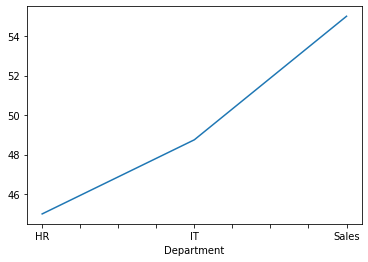

In [3]:
# Method 1
# your code here

employees.groupby('Department')['Salary'].mean().plot()
#Francesca = How can I add data label on each point? How can I visualise per department? How can I add legends? and also change the type of graph? 

In [4]:
# Method 2
# your code here
employees.pivot("Department","Years","Salary")
#Francesca self note: is there any reason why it should be "Years" in the middle?   
#판다스 피봇 사용법 구글링 : 행, 열, 값 
#피봇 - 값을 넣을때, 피봇 테이블 - 평균 값을 계산한다거나 밸류 카운트 처럼 계산한다더나.. 엑셀 사용자들이 좀 더 편하게 사용하기 쉽게... 조금도 어려운 분석을 하려면 그룹바이나 어플라이  

Years,1,2,3,4,7,8
Department,,,,,,
HR,NaN,30.0,NaN,35.0,NaN,70.0
IT,35.0,30.0,NaN,NaN,60.0,70.0
Sales,NaN,55.0,55.0,NaN,NaN,NaN


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [5]:
# your code here
employees.pivot_table(values="Salary", index="Department", columns="Title", aggfunc="mean")

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [6]:
# your code here
employees.pivot_table(values="Salary", index="Title", columns="Years")

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [41]:
# your code here
#Francesca : (1) 부서별 평균 연봉과 평균 직원수 (2) 직책별 평균 연봉 및 직책별 직원수 ..?? 
employees.pivot_table(values="Salary", index="Department", columns="Title", aggfunc=('mean'))


Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your code here
employees.pivot_table(values="Salary", index="Department", columns="Title", aggfunc=('count','mean','max','min','std'))

#Francesca self note = 신뢰구간 

count                     max                    mean          \
Title         VP analyst associate    VP analyst associate    VP analyst   
Department                                                                 
HR           1.0     2.0       NaN  70.0    35.0       NaN  70.0    32.5   
IT           1.0     2.0       1.0  70.0    35.0      60.0  70.0    32.5   
Sales        NaN     NaN       2.0   NaN     NaN      55.0   NaN     NaN   

                       min                         std            
Title      associate    VP analyst associate   analyst associate  
Department                                                        
HR               NaN  70.0    30.0       NaN  3.535534       NaN  
IT              60.0  70.0    30.0      60.0  3.535534       NaN  
Sales           55.0   NaN     NaN      55.0       NaN       0.0

In [9]:
"""
your commments here
"""


'\nyour commments here\n'

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your code here
employees.pivot_table(values="Salary", index="Department", columns="Title", aggfunc=('count','mean','max','min','std'), fill_value=0)

count                   max                   mean          \
Title         VP analyst associate  VP analyst associate   VP analyst   
Department                                                              
HR             1       2         0  70      35         0   70    32.5   
IT             1       2         1  70      35        60   70    32.5   
Sales          0       0         2   0       0        55    0     0.0   

                     min                   std                      
Title      associate  VP analyst associate  VP   analyst associate  
Department                                                          
HR                 0  70      30         0   0  3.535534         0  
IT                60  70      30        60   0  3.535534         0  
Sales             55   0       0        55   0  0.000000         0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [11]:
# your code here
employees.groupby(['Department','Title']).agg({'Name':'count','Salary':'sum'})

Name  Salary
Department Title                  
HR         VP            1      70
           analyst       2      65
IT         VP            1      70
           analyst       2      65
           associate     1      60
Sales      associate     2     110

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [12]:
# your code here
employees.groupby(['Department','Title']).agg({'Years':'sum','Salary':'mean'})

Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [13]:
# your code here

# Challenge 2

Read the `fitbit` dataset from
[here](https://drive.google.com/file/d/1V3A0sRLmAb6BDFoZBIrjUOMl5Ap9wSts/view?usp=sharing) and place it in the data folder


Save your data in a variable called `fitbit`.

In [14]:
# your code here

fitbit=pd.read_csv("../data/Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [15]:
# your code here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [16]:
# your code here
fitbit[['Minutes Very Active', 'Steps']].corr()
#Francesca self note - 이걸로 연관성을 어떻게 알 수 있는지요? 상관 관계.. 

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [17]:
import matplotlib.pyplot as plt;

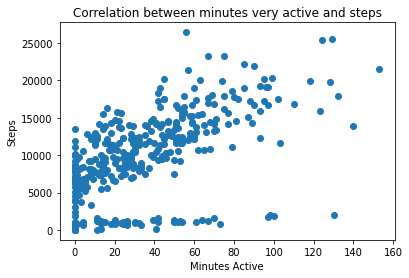

In [18]:

plt.scatter(fitbit['Minutes Very Active'],fitbit['Steps'])
plt.title('Correlation between minutes very active and steps')
plt.xlabel('Minutes Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [19]:
"""
your commments here
"""
#Francesca self note : Most of the users can not be very active after 60 minutes 상관관계가 그렇게 크지는 않다. 클 수록 직선이 좁아짐. 


'\nyour commments here\n'

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [22]:
# your code here
fitbit[['Minutes Sedentary', 'Steps']].corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

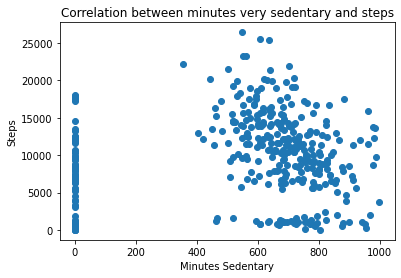

In [23]:
# your code here

plt.scatter(fitbit['Minutes Sedentary'],fitbit['Steps'])
plt.title('Correlation between minutes very sedentary and steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""
#Francesca self note: Longer you rest, the more you can achieve 

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [26]:
# your code here
fitbit[['MinutesOfSleep', 'Steps']].corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

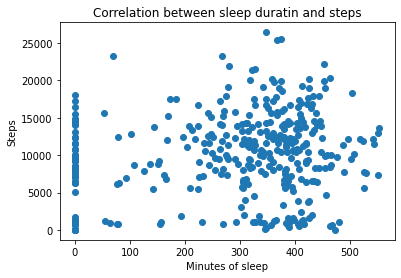

In [27]:
# your code here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title("Correlation between sleep duration and steps")
plt.xlabel("Minutes of sleep")
plt.ylabel("Steps")
plt.show()

In [29]:
#Analysis : sleeping between 300-400 mins will boost your performance of steps #+0.9 양의 상관간계 -0.9 음의 상관관계 .. 박스의 엑스 직선을 그릴 수 있을때.. 하나가 양 다른 하나가 음  

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [30]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [32]:
# your code here
cor_fit=fitbit[columns].corr()
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [33]:
# your code here

cor_fit.Steps.sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

Read the `time_grades` dataset from 
[here](https://drive.google.com/file/d/1zKAqZPjLnU96cvfMzqfFz-hH6YxCNVKN/view?usp=sharing) and place it in the data folder


Save your data in a variable called `time_grades`.

In [35]:
# your code here

time_grades=pd.read_csv('../data/Time_Grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:>

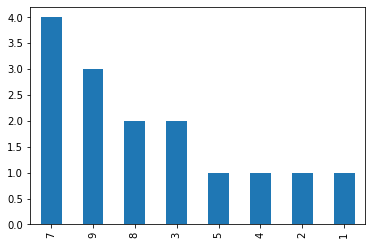

In [36]:
# your code here
time_grades.Grade.value_counts().plot(kind='bar')
#Francesca : name? how can you insert the name here? 

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [37]:
# your code here

time_grades[['Study time','Grade']].corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [38]:
"""
your commments here
"""
time_grades[['Study time','Grade']].corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

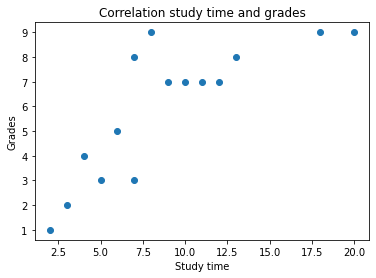

In [40]:
# your code here

plt.scatter(time_grades['Study time'],time_grades['Grade'])
plt.title("Correlation study time and grades")
plt.xlabel("Study time")
plt.ylabel("Grades")
plt.show()

In [ ]:
"""
your commments here
"""
#Francesca = the gradesa are proportional to study time. 모수가 낮을때는 신뢰도가 더 낮다. 하지만 .. .

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""